In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
session = Session(engine)
sel = [Measurement.date, Measurement.prcp]
# date = dt.datetime(2017, 8, 24)
# date2 = dt.datetime(2016, 8, 22)
date = dt.datetime(2017,8,23)
date2 = dt.datetime(2017,8,23) - dt.timedelta(days=365)
yr_prcp = session.query(*sel).\
    filter(Measurement.date <= date).\
    filter(Measurement.date >= date2).\
    order_by(Measurement.date).all()
session.close()
yr_prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

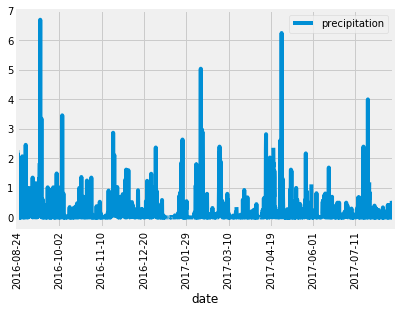

In [12]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(yr_prcp, columns=['date','precipitation'])
df.set_index('date', inplace=True)
# df.plot.bar()

session.close()
plt.show()
df.plot(rot=90)


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [14]:
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
session = Session(engine)

sel = [Measurement.station, Measurement.id]
station = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

station = pd.DataFrame(station, columns=['station', 'id'])
session.close()
station.shape[0]

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session = Session(engine)

sel = [Measurement.station, Measurement.id]
station2 = session.query(*sel).\
    order_by(Measurement.station).all()

station2 = pd.DataFrame(station2, columns=['station', 'id'])
session.close()
station2['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session = Session(engine)

sel = [Measurement.station, Measurement.id, Measurement.tobs]
station3 = session.query(*sel).\
  filter(Measurement.station =="USC00519281")

station3 = pd.DataFrame(station3, columns=['station', 'id' , 'tobs'])
session.close()
print("Min temp of most active station: ", station3['tobs'].min())
print("Max temp of most active station: ", station3['tobs'].max())
print("Average temp of most active station: ", station3['tobs'].mean())

Min temp of most active station:  54.0
Max temp of most active station:  85.0
Average temp of most active station:  71.66378066378067


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


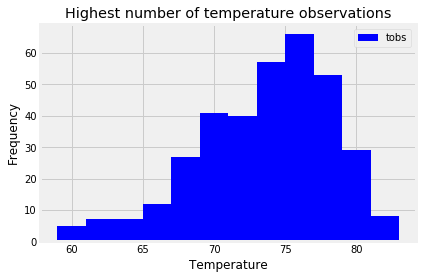

In [19]:
# Generate a normal distribution, center at x=0 and y=5
session = Session(engine)

sel = [Measurement.station, Measurement.id, Measurement.tobs]
date = dt.datetime(2017, 8, 24)
date2 = dt.datetime(2016, 8, 22)

station4 = session.query(*sel).\
  filter(Measurement.station =="USC00519281").\
  filter(Measurement.date <= date).\
  filter(Measurement.date >= date2).\
    order_by(Measurement.date).all()
session.close()

station4 = pd.DataFrame(station4, columns=['station', 'id', 'tobs'])


x = station4.tobs
num_bins = 12

plt.hist(x, num_bins, density=False, facecolor='blue', alpha =1, label='tobs')


plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Highest number of temperature observations')
plt.legend(loc='best')
session.close()
plt.show()

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# query_date1 = dt.date(2017, 8, 23)
# query_date2 = dt.date(2016, 8, 23)
print(calc_temps('2017-01-01', '2017-01-07'))


[(62.0, 68.36585365853658, 74.0)]


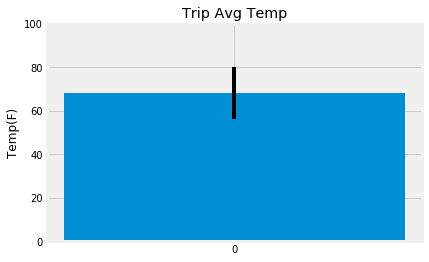

<Figure size 72x72 with 0 Axes>

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
query_date1 = dt.date(2017, 1, 1)
query_date2 = dt.date(2017, 1, 7)
Bar = pd.DataFrame(calc_temps(query_date1, query_date2), columns=['Min', 'Avg', 'Max'])

N = 1
ind = np.arange(len(Bar.Avg))  # the x locations for the groups
width = .01     # the width of the bars: can also be len(x) sequence
err = (Bar.Max-Bar.Min)

p1 = plt.bar(ind, Bar.Avg, width, yerr=(err))



plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.yticks(np.arange(0, 101, 20))
plt.xticks(ind)

# plt.tight_layout()
plt.figure(figsize=(1,1))
plt.show()

In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

query_date1 = dt.date(2017, 1, 1)
query_date2 = dt.date(2017, 1, 7)
session = Session(engine)

sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
results = session.query(*sel).\
filter(Measurement.station==Station.station).\
filter(Measurement.date >= query_date1).\
filter(Measurement.date <= query_date2).\
group_by(Station.name).\
order_by(func.sum(Measurement.prcp).desc()).all()

results

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.6),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.2),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)]

## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
